In [301]:
%matplotlib inline
from matplotlib import pyplot as plt

from skimage.io import imread
from skimage import img_as_float
import numpy as np

orig_image = img_as_float(imread('parrots.jpg'))
w, h, d = orig_image.shape
orig_image = orig_image.reshape((w * h, d))

In [302]:
def image_plot(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(np.reshape(image, (w, h, d)))

In [303]:
from math import log

def MSE(orig, im):
    S = (orig - im) ** 2
    sum_ = np.sum(np.sum(S, 0))
    result = sum_ / (3 * orig.shape[0])
    return result

def PSNR(orig, im):
    MAXi = 1
    psnr = 20 * log(MAXi, 10) - 10 * log(MSE(orig_image, img), 10)
    return psnr

In [304]:
from sklearn.cluster import KMeans

PSNR_BOUND = 20
bound_clusters_number = None

images_info = []

for n_clusters in xrange(1, 21):
    clf = KMeans(
        init='k-means++', random_state=241, n_clusters=n_clusters, n_jobs=3)
    
    clf.fit(orig_image)
    labels = clf.labels_
    
    img = orig_image.copy()
    for label in xrange(n_clusters):
        mask = labels == label
        color = np.mean(orig_image[mask], 0)
        img[mask] = color
        
    psnr = PSNR(orig_image, img)
    
    images_info.append({
            'clusters': n_clusters,
            'psnr': psnr,
            'img': img
        })
    
    if psnr > PSNR_BOUND and not bound_clusters_number:
        bound_clusters_number = n_clusters

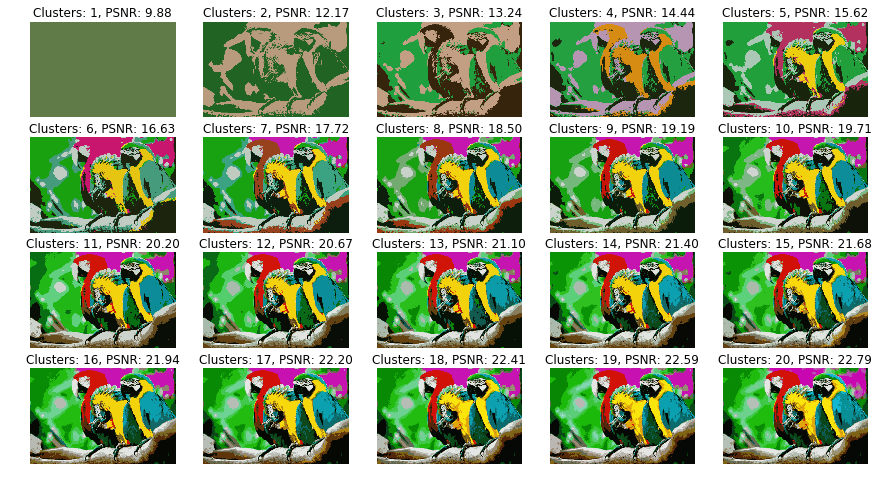

In [305]:
f = plt.figure(figsize=(15, 10))

for i, info in enumerate(images_to_show, start=1):
    image = info['img']
    clusters = info['clusters']
    psnr = info['psnr']
    
    title = 'Clusters: {cl}, PSNR: {psnr:.2f}'.format(cl=clusters, psnr=psnr)
    
    s = f.add_subplot(5, 5, i)
    s.axis('off')
    s.set_title(title)
    s.imshow(np.reshape(image, (w, h, d)))


In [306]:
res1 = str(bound_clusters_number)
with open('assignments/1_1.txt', 'w') as f:
    f.write(res1)

print res1

11
